<h1>Project: Credit Risk Modelling</h1>

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Loading 

In [3]:
df_cust = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [4]:
df_cust.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [5]:
df_cust.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [6]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [7]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


We will Merge the datasets into single one

In [8]:
df = pd.merge(df_cust,df_loans,on='cust_id')

In [9]:
df.shape

(50000, 26)

In [10]:
df_new = pd.merge(df,df_bureau,on='cust_id')

In [11]:
df_new.shape

(50000, 33)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

The column **`default`** is of type **boolean**. Since most machine learning algorithms expect numerical inputs, this column will be converted to an **integer** type.


In [13]:
df_new.default = df_new.default.astype(int)

df_new.info()

In [14]:
# Check for class imbalance

df_new['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [15]:
4297/50000*100  

8.594

- Approximately **8.5%** of the data belongs to class **`default = 0`**, while **91.5%** belongs to class **`default = 1`**.
- This indicates a **high class imbalance**, which will be addressed in the modeling stage

### Data Cleaning

#### Handling Misssing values, Duplicate Values, inconsistent values

In [16]:
# check for Missing values
df_new.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

- The column **`residence_type`** has **62 missing values**.
- Since this is a **categorical variable**, we examine its unique values.
- The missing values are replaced with the **most frequent value (mode)**.

In [17]:
df_new.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [18]:
mode_residence = df_new.residence_type.mode()[0]
mode_residence

'Owned'

In [19]:
df_new.residence_type.fillna(mode_residence,inplace=True)

C:\Users\Ashok\AppData\Local\Temp\ipykernel_5712\2676779318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new.residence_type.fillna(mode_residence,inplace=True)


In [20]:
df_new.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
default                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd 

In [21]:
# Check for Duplicated values

df_new.duplicated().sum()

np.int64(0)

In [22]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [23]:
df_new.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,...,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,39.55,2640897.50,1.94,16.02,419090.86,4704827.52,3999678.80,80494.71,719942.18,3199743.04,...,1337636.04,989126.38,0.09,2.50,1.00,76.13,4.88,26.86,5.01,43.36
std,9.85,2629441.06,1.54,8.93,168982.67,6267276.39,5376552.03,117312.26,967779.37,4301241.63,...,1214713.89,1046071.89,0.28,1.12,0.81,43.76,5.85,32.83,2.03,29.36
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1147000.00,967000.00,19340.00,174060.00,773600.00,...,424799.00,287007.50,0.00,1.00,0.00,42.00,0.00,0.00,4.00,18.00
50%,40.00,1892000.00,2.00,16.00,400001.00,2656000.00,2240000.00,44800.00,403200.00,1792000.00,...,1002309.00,668525.00,0.00,3.00,1.00,71.00,3.00,14.00,5.00,39.00
75%,46.00,3332250.00,3.00,24.00,560001.00,5172250.00,4611000.00,92240.00,829980.00,3688800.00,...,1790751.00,1238667.00,0.00,4.00,2.00,107.00,9.00,46.00,6.00,67.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5698029.90,8607420.00,38255200.00,...,5000000.00,7846643.00,1.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00


In [24]:
df_new.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

The features are divided into **continuous** and **categorical** columns for appropriate preprocessing.

In [35]:
continuous_columns = df_new.select_dtypes(include = ['int','float']).drop(columns = ["default","zipcode"]).columns.tolist()

In [36]:
continuous_columns

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [96]:
categorical_columns = df_new.select_dtypes(include = ['object']).drop(columns = ['cust_id','disbursal_date','installment_start_dt','loan_id']).columns.tolist()

In [97]:
categorical_columns.extend(['zipcode','default'])

In [98]:
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

Since we have completed the data cleaning step, we will **perform the train–test split before exploratory data analysis (EDA) and feature engineering (FE)** to avoid data leakage.


#### Train Test Split 

In [40]:
# X: feature variables, y: Target variable

X = df_new.drop("default",axis=1)
y = df_new['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42,stratify = y) 

df_train = pd.concat([X_train,y_train],axis = 'columns')

df_test = pd.concat([X_test,y_test],axis = 'columns')


In [41]:
df_test.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0


### Univariate Analysis

#### Outliers Detection through Boxplot visualization

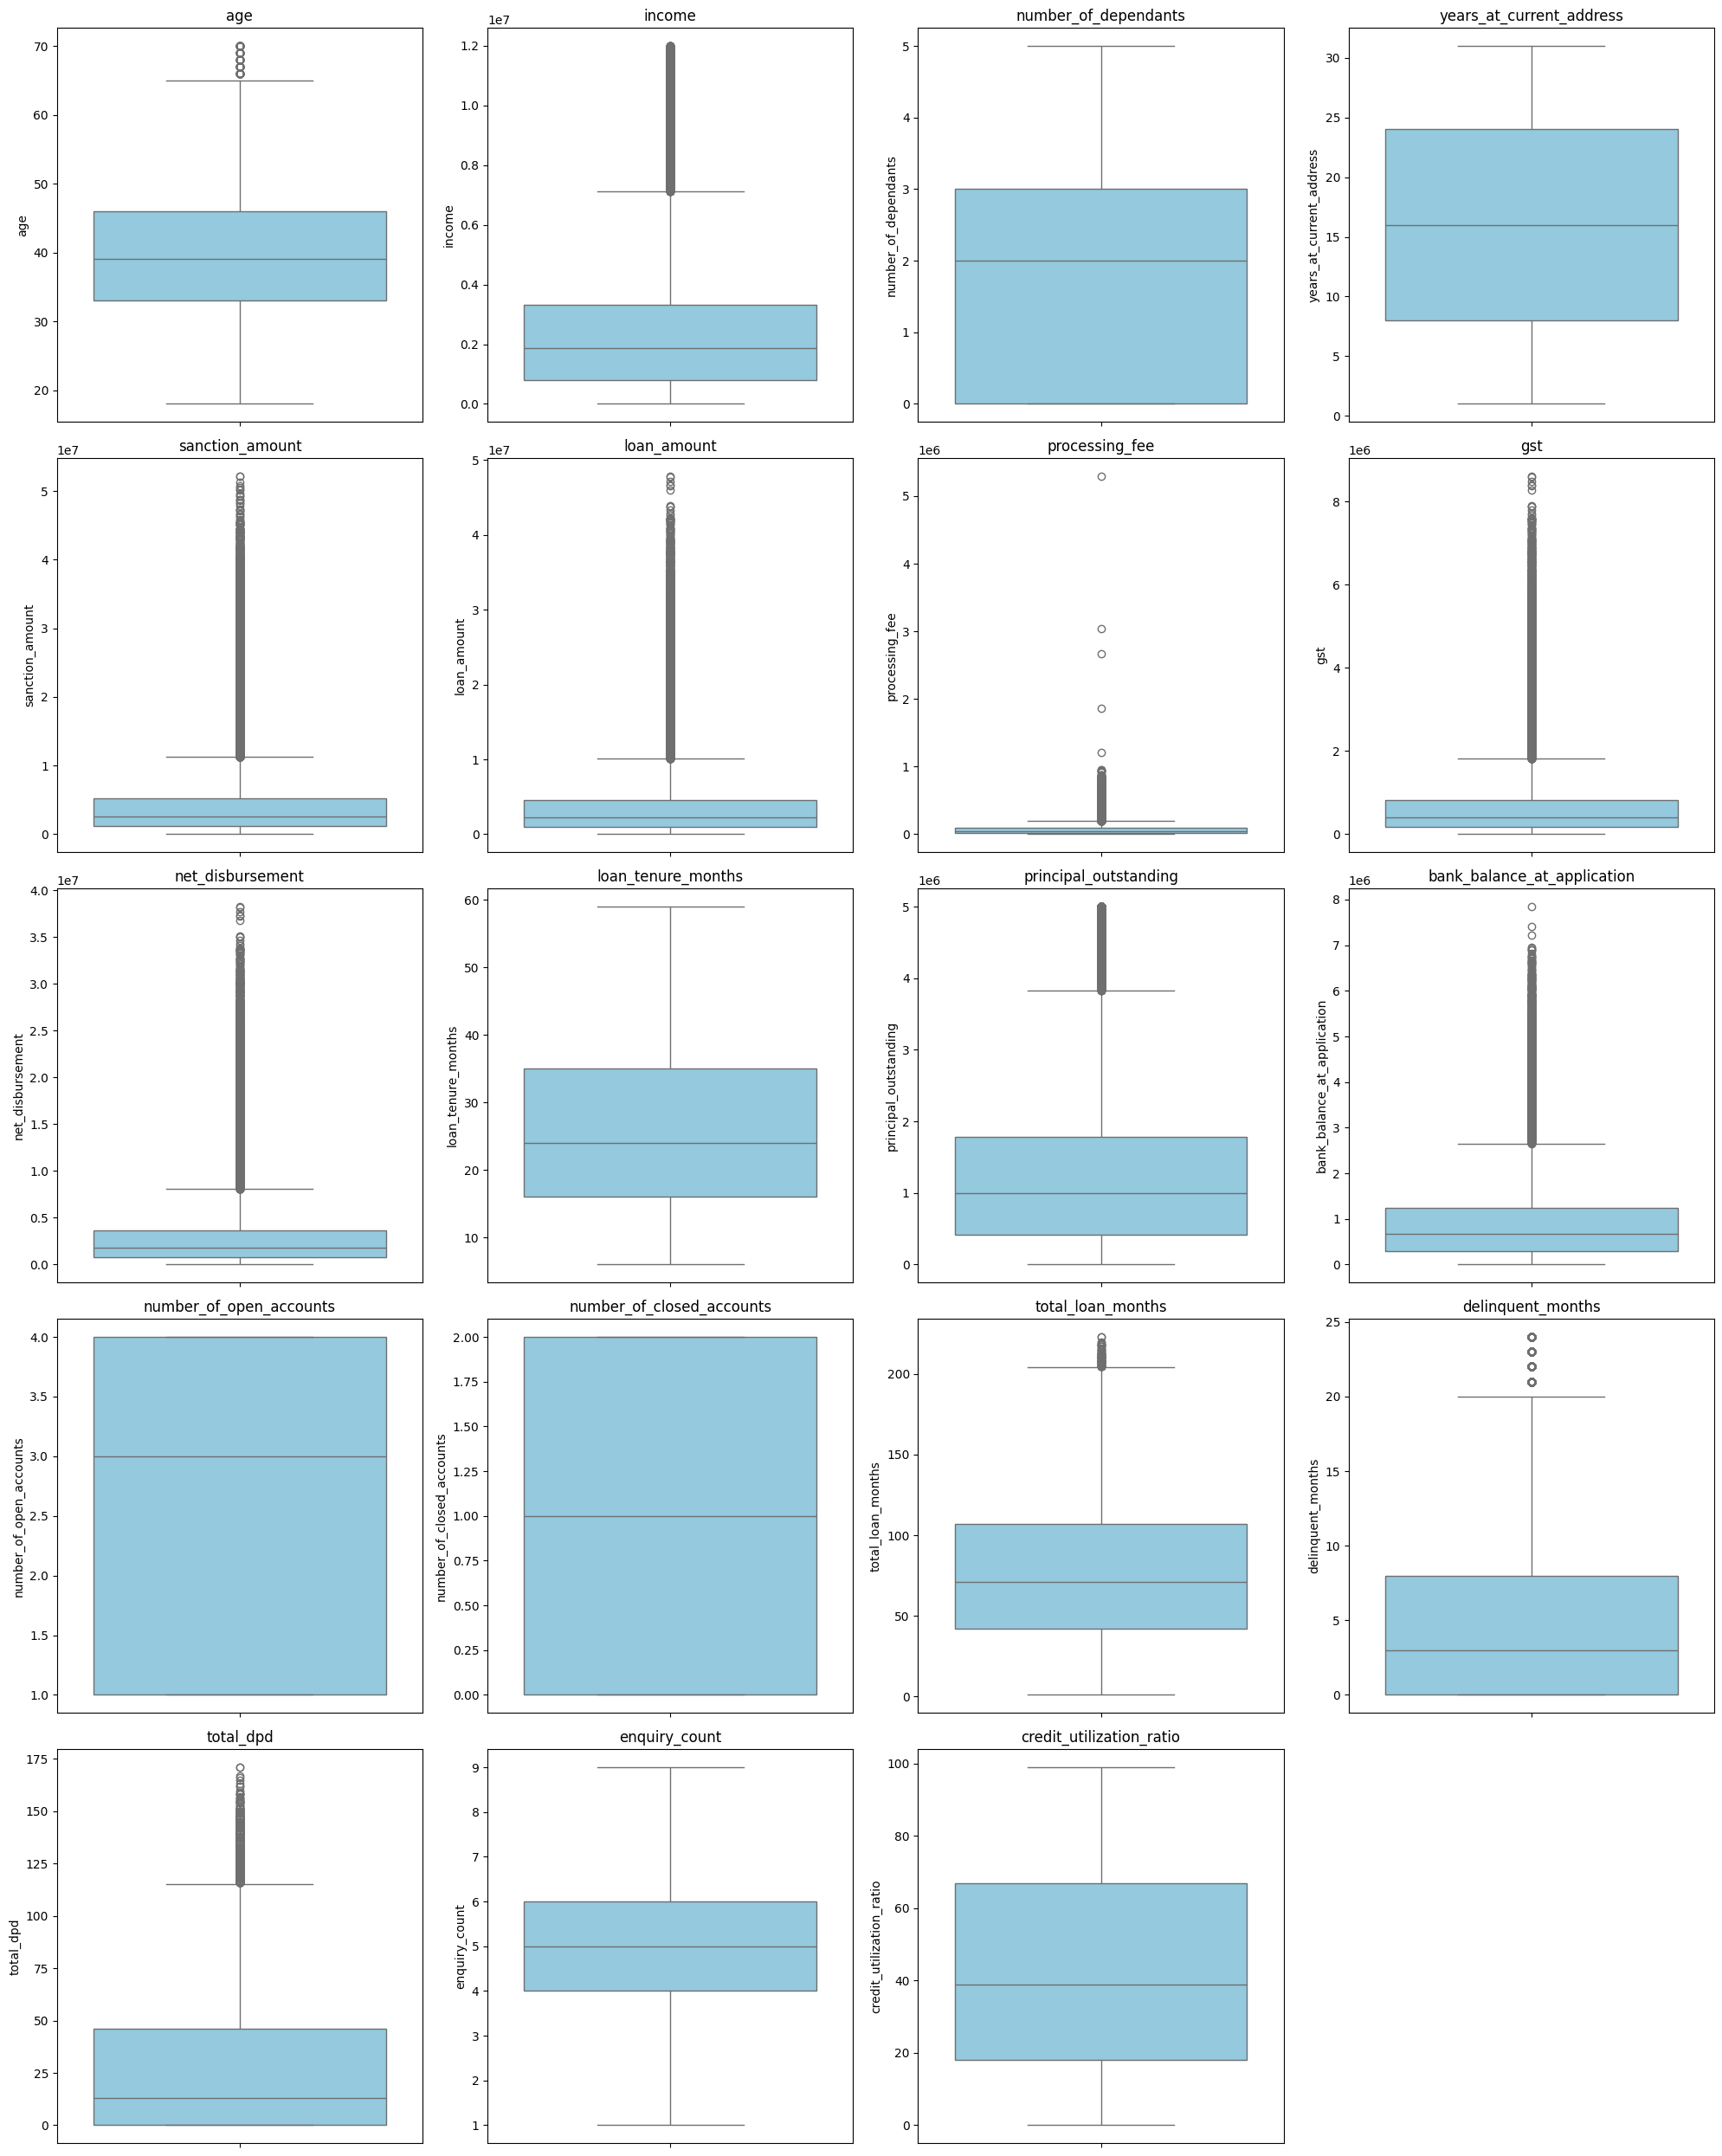

In [47]:
# We will plot boxplots for all continuos columns with 4 plots in a row

cols = 4
rows = (len(continuos_columns) + cols - 1) // cols  # Calculate rows needed

# Create the figure
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy iteration

# Plot each column
for i, col in enumerate(continuous_columns):
    sns.boxplot(y=df_train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(
    "boxplots_continuous_columns.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

There seems to be an issue with the **processing_fee** and **GST** variables.  
We will dive deeper into these features in the next steps.

#### Outliers Detection through Histogram visualization

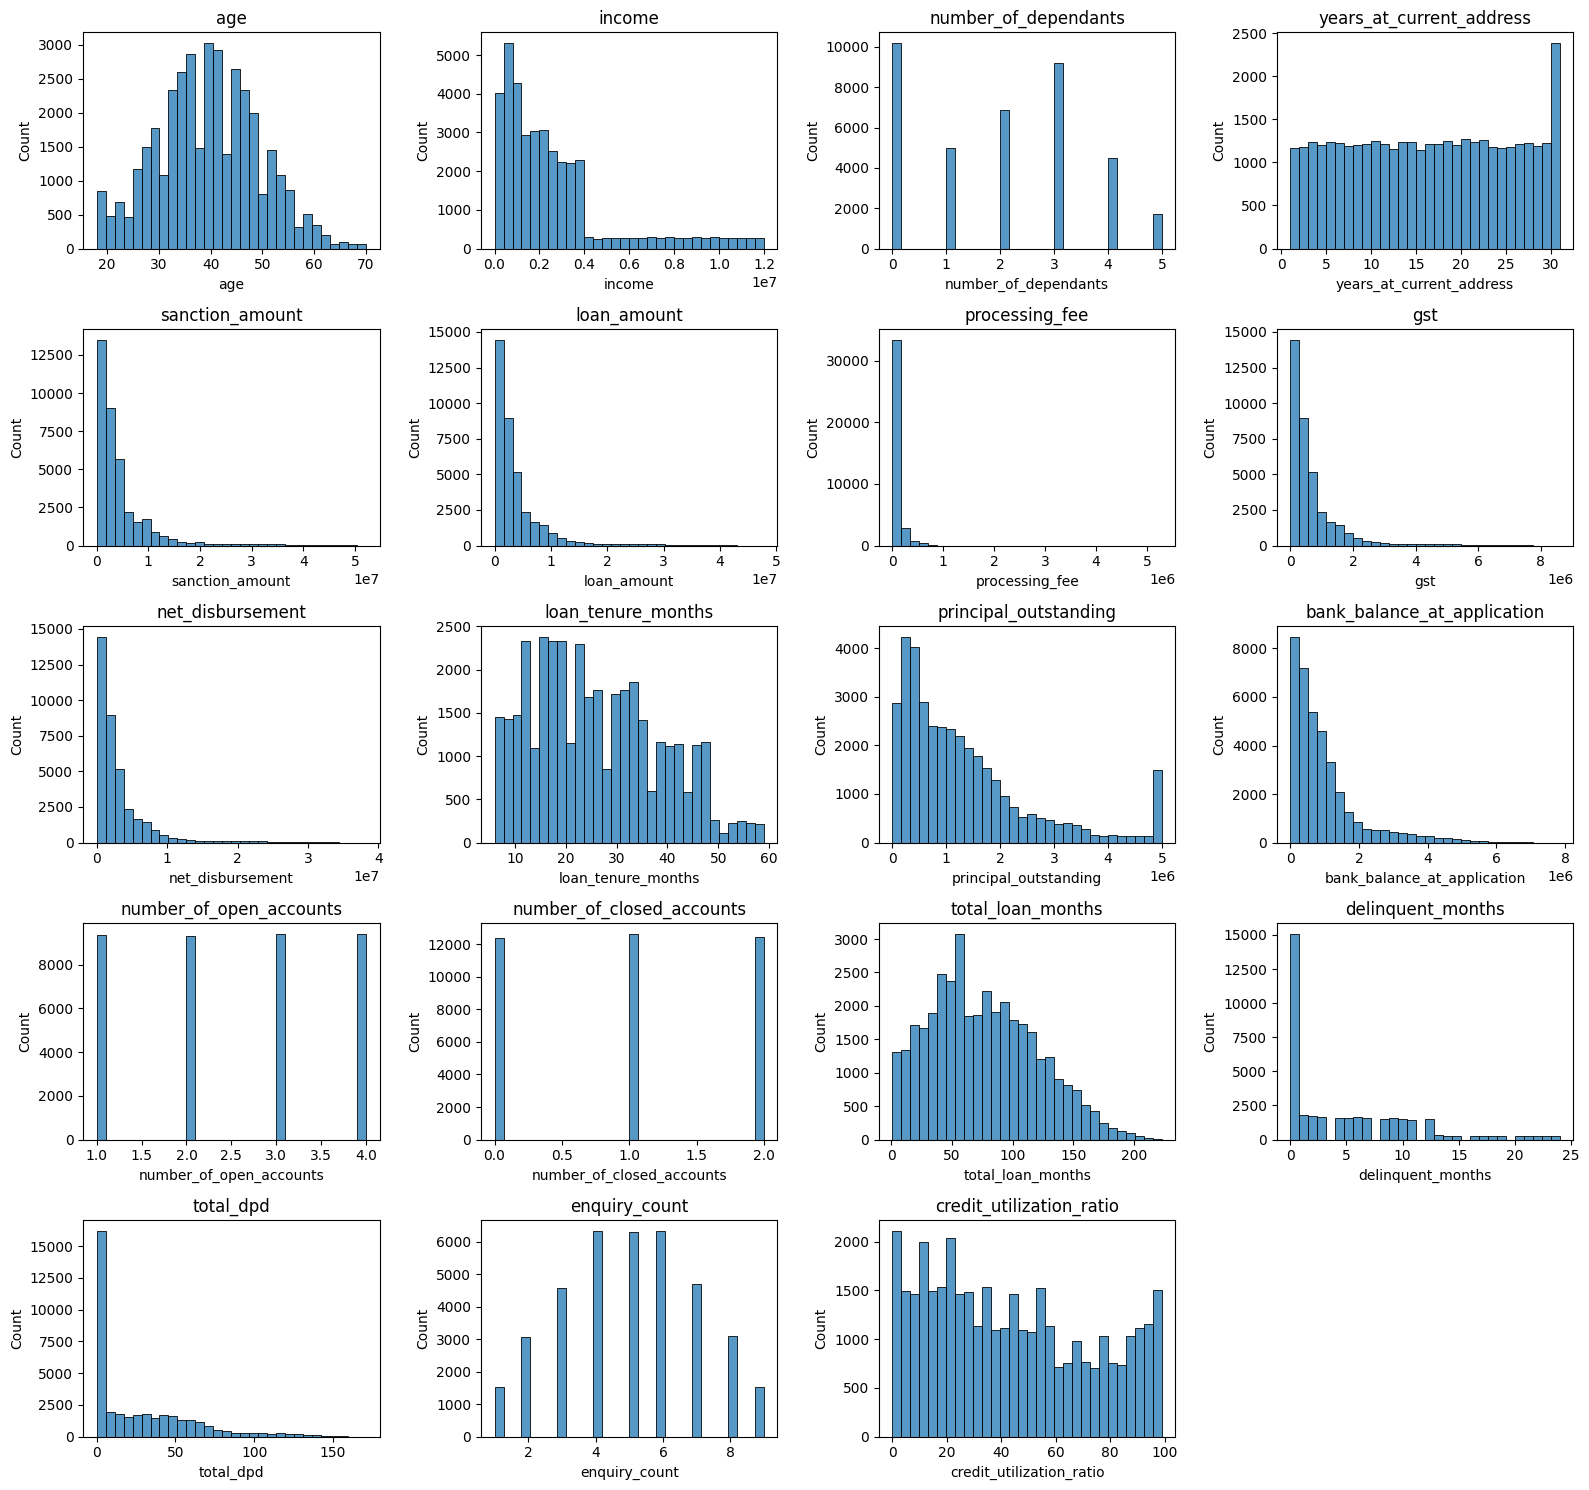

In [48]:
import math

n_cols = 4
n_rows = math.ceil(len(continuous_columns) / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_train[col], bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.savefig(
    "histograms_continuous_columns.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

#### Outlier Handling

In [49]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

### Observation

The maximum value of **processing_fee** is **5,293,543.52** (≈ **52 lakhs**), which appears to be unrealistic.

Let’s identify the corresponding **loan_amount** for the record where the **processing_fee** is **5,293,543.52**.

In [52]:
df_train[df_train['processing_fee']==df_train['processing_fee'].max()]['loan_amount']


9898    3626000
Name: loan_amount, dtype: int64

### Observation

For a **loan_amount** of **3,626,000**, a **processing_fee** of **5,293,543.52** is clearly erroneous.

We will remove this record and also identify other instances where the **processing_fee** exceeds the **loan_amount**, as these values are likely incorrect.

After consulting with the business team, we learned that the **processing_fee** cannot exceed **3% of the loan_amount**.  

We will identify records that violate this rule and remove them from the dataset.

In [59]:
df_train[df_train['processing_fee']>=df_train['loan_amount']][['processing_fee','loan_amount','net_disbursement']]

,processing_fee,loan_amount,net_disbursement
45224,0.00,0,0
23981,2669791.02,2234000,1787200
2278,0.00,0,0
28174,1214492.67,966000,772800
11092,0.00,0,0
46640,0.00,0,0
47089,1858964.77,1738000,1390400
29305,3036378.01,2616000,2092800
9898,5293543.52,3626000,2900800
47428,0.00,0,0


In [60]:
df_train[df_train['processing_fee']>df_train['loan_amount']*0.03][['processing_fee','loan_amount','net_disbursement']]

,processing_fee,loan_amount,net_disbursement
23981,2669791.02,2234000,1787200
28174,1214492.67,966000,772800
47089,1858964.77,1738000,1390400
29305,3036378.01,2616000,2092800
9898,5293543.52,3626000,2900800


### Processing Fee Validation

We identified two types of irregularities with the **processing_fee**:

1. Instances where the **processing_fee** exceeds the **loan_amount**.
2. Instances where the **processing_fee** exceeds **3% of the loan_amount**.

**Note:** There are 7 exceptions where the **processing_fee** exceeds the **loan_amount**. In these cases, **net_disbursement**, **processing_fee**, and **loan_amount** are all zero.


In [75]:
df_train_1 = df_train[df_train['processing_fee']<df_train['loan_amount']*0.03].copy()


In [76]:
df_train_1.shape

(37488, 33)

We will apply the same rules to the test dataset:

In [77]:
df_test_1 = df_test[df_test['processing_fee']<df_test['loan_amount']*0.03].copy()

In [78]:
df_test_1.shape

(12497, 33)

### Validation: Net Disbursement

The **net_disbursement** should not exceed the **loan_amount**.  
We will identify and remove any records violating this rule in both training and test datasets.

In [81]:
df_train_1[df_train_1['net_disbursement'] > df_train_1['loan_amount']]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [82]:
df_test_1[df_test_1['net_disbursement'] > df_test_1['loan_amount']]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


**No records were found violating this rule** in both training and test datasets.  

This confirms that all disbursements in our dataset are within the valid range.

In [99]:
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

In [100]:
# Checking for unique values in categorical columns:

for col in categorical_columns:
    print("Categorical Column", col, ":",df_train_1[col].unique())
    

Categorical Column gender : ['M' 'F']
Categorical Column marital_status : ['Married' 'Single']
Categorical Column employment_status : ['Self-Employed' 'Salaried']
Categorical Column residence_type : ['Owned' 'Mortgage' 'Rented']
Categorical Column city : ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
Categorical Column state : ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
Categorical Column loan_purpose : ['Home' 'Education' 'Personal' 'Auto']
Categorical Column loan_type : ['Secured' 'Unsecured']
Categorical Column zipcode : [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
Categorical Column default : [0 1]


### Cleaning Categorical Column: `loan_purpose`

While inspecting the `loan_purpose` column, we found a typo:  

- `"Personal"` and `"Personaal"` refer to the same category.  

We will correct `"Personaal"` to `"Personal"` to ensure consistency in our categorical data before model training.


In [101]:

df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')

print(df_train_1['loan_purpose'].unique())


['Home' 'Education' 'Personal' 'Auto']


We will apply the same rules to the test dataset:

In [102]:
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')
print(df_test_1['loan_purpose'].unique())

['Home' 'Education' 'Auto' 'Personal']


In [111]:
 print(f"Missing values: {df_train_1[col].isnull().sum()}")

Missing values: 0


In [112]:
 print(f"Missing values: {df_test_1[col].isnull().sum()}")

Missing values: 0


### Exploratory Data Analysis (EDA)

In [113]:
continuous_columns

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

#### Continuous Variable EDA

##### Computes descriptive statistics for the age column within each default group

In [119]:
df_train_1.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.00,39.77,9.88,18.00,33.00,40.00,46.00,70.00
1,3223.00,37.12,9.29,18.00,31.00,37.00,44.00,70.00


In [120]:
age_summary = (
    df_train_1.groupby('age')['default'].agg(
        total_customers='count',
        default_cases='sum',
        default_rate='mean'
    )
    .reset_index()
)
age_summary

,age,total_customers,default_cases,default_rate
0,18,655,84,0.13
1,19,191,20,0.10
2,20,223,28,0.13
3,21,257,28,0.11
4,22,331,40,0.12
5,23,348,51,0.15
6,24,460,58,0.13
7,25,546,62,0.11
8,26,624,75,0.12
9,27,704,70,0.10


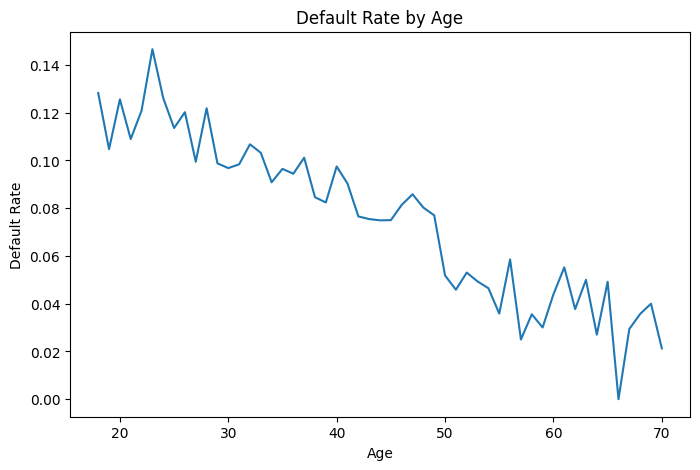

In [122]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=age_summary,
    x='age',
    y='default_rate'
)
plt.xlabel("Age")
plt.ylabel("Default Rate")
plt.title("Default Rate by Age")
plt.show()

In [129]:
age_bins = [18, 25, 30, 35, 40, 45, 50, 60, 70]

df_train_1['age_bin'] = pd.cut(
    df_train_1['age'],
    bins=age_bins
)

age_bin_summary = (
    df_train_1
    .groupby('age_bin')['default']
    .agg(
        total_customers='count',
        default_cases='sum',
        default_rate='mean'
    )
    .reset_index()
)
age_bin_summary

C:\Users\Ashok\AppData\Local\Temp\ipykernel_5712\4276180916.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_bin')['default']


,age_bin,total_customers,default_cases,default_rate
0,"(18, 25]",2356,287,0.12
1,"(25, 30]",3897,415,0.11
2,"(30, 35]",6018,595,0.10
3,"(35, 40]",7375,678,0.09
4,"(40, 45]",6955,547,0.08
5,"(45, 50]",5141,394,0.08
6,"(50, 60]",4411,196,0.04
7,"(60, 70]",680,27,0.04


### 📊 Age-wise Credit Risk Analysis

#### 🔍 Key Observations
- **Default risk decreases consistently with age**.
- **Younger borrowers (18–25 years)** exhibit the **highest default rate (~12%)**, making them the riskiest age segment.
- Default rates **gradually decline from ages 25 to 45**, reflecting improving credit stability.
- **Middle-aged borrowers (40–50 years)** show **moderate risk**, with default rates around **8%**.
- **Older borrowers (50+ years)** are the **safest segment**, with default rates dropping sharply to **~4%**.
- Although the **60–70 age group** represents a smaller portion of the portfolio, it maintains **low default risk**, indicating stable repayment behavior.

#### 🎯 Modeling & Scorecard Implications
- Age demonstrates **strong predictive power** with a **stable and interpretable trend**.
- The variable is **well-suited for WoE-based transformation** and inclusion in the credit scorecard.


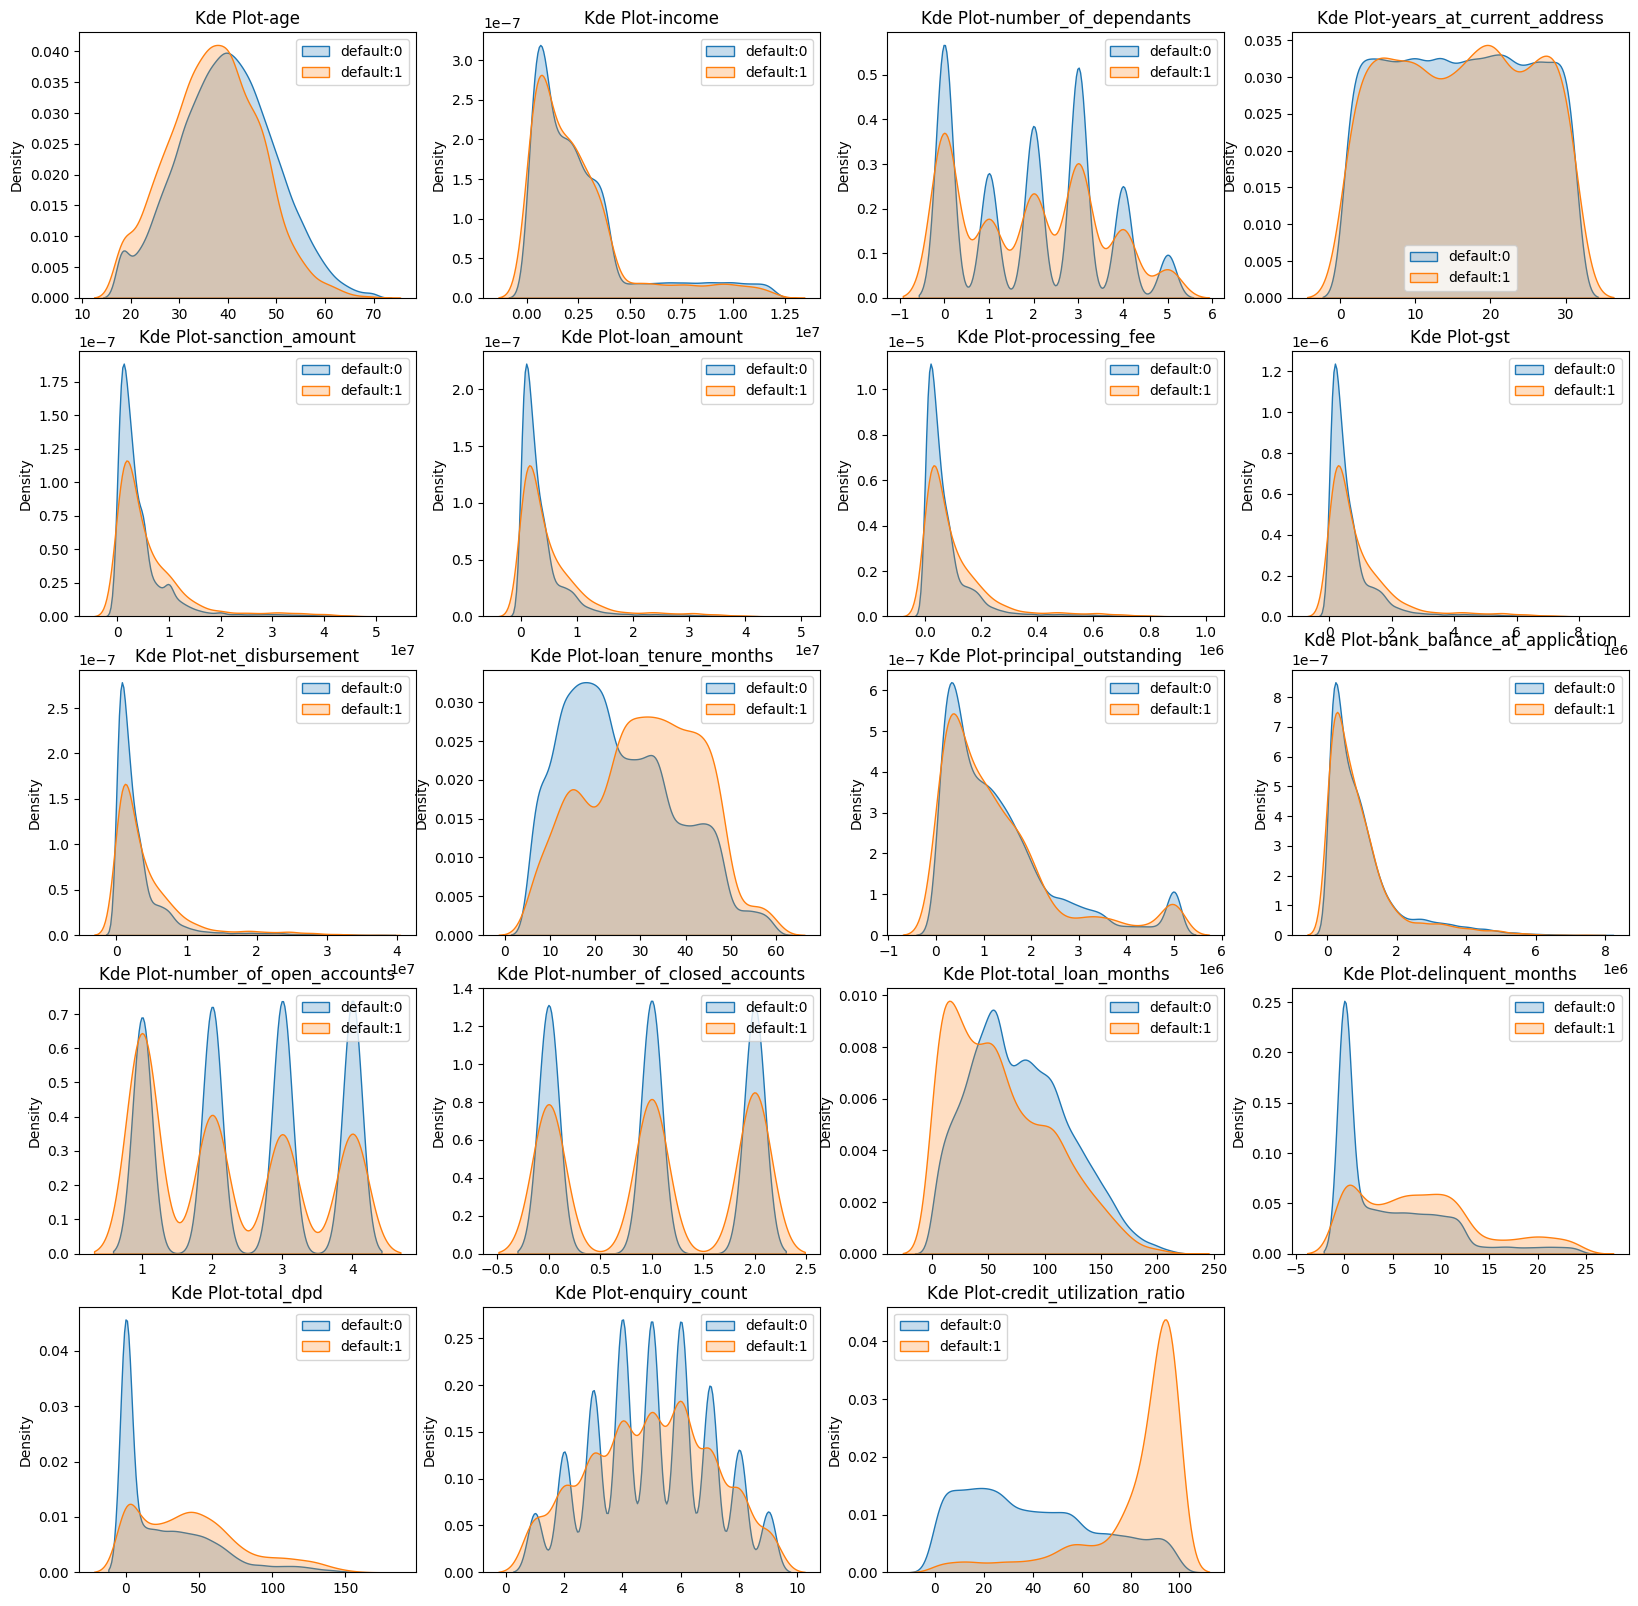

In [162]:
n_col=4
n_row=(len(continuous_columns)+n_col-1)//n_col
plt.figure(figsize=(n_col*5,n_row*4))

for i, col in enumerate(continuous_columns,start=1):
    plt.subplot(n_row,n_col,i)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0],label='default:0',fill=True)
    sns.kdeplot(df_train_1[col][df_train_1['default']==1],label='default:1',fill=True)
    plt.title(f'Kde Plot-{col}')
    plt.xlabel('')
    plt.legend()

plt.show()

###  Insights from Continuous Variable Analysis

- **Strong Predictors**:  
  The following columns show a clear pattern where **higher values are associated with higher likelihood of default**:  
  - `loan_tenure_months`  
  - `delinquent_months`  
  - `total_dpd`  
  - `credit_utilization_ratio`  

  These variables appear to be strong predictors of credit risk.

- **Weak/Neutral Predictors**:  
  For the remaining continuous variables, the distributions **do not show any obvious relationship with default**, suggesting weaker predictive power individually.

- **Loan Amount & Income**:  
  Surprisingly, `loan_amount` and `income` do not show a clear direct relationship with default.  
  - Hypothesis: Combining these two variables to create a **Loan-to-Income (LTI) ratio** may reveal stronger influence on default probability.  
  - This will be explored further in subsequent analysis.


#### Check Categorical values Distribution

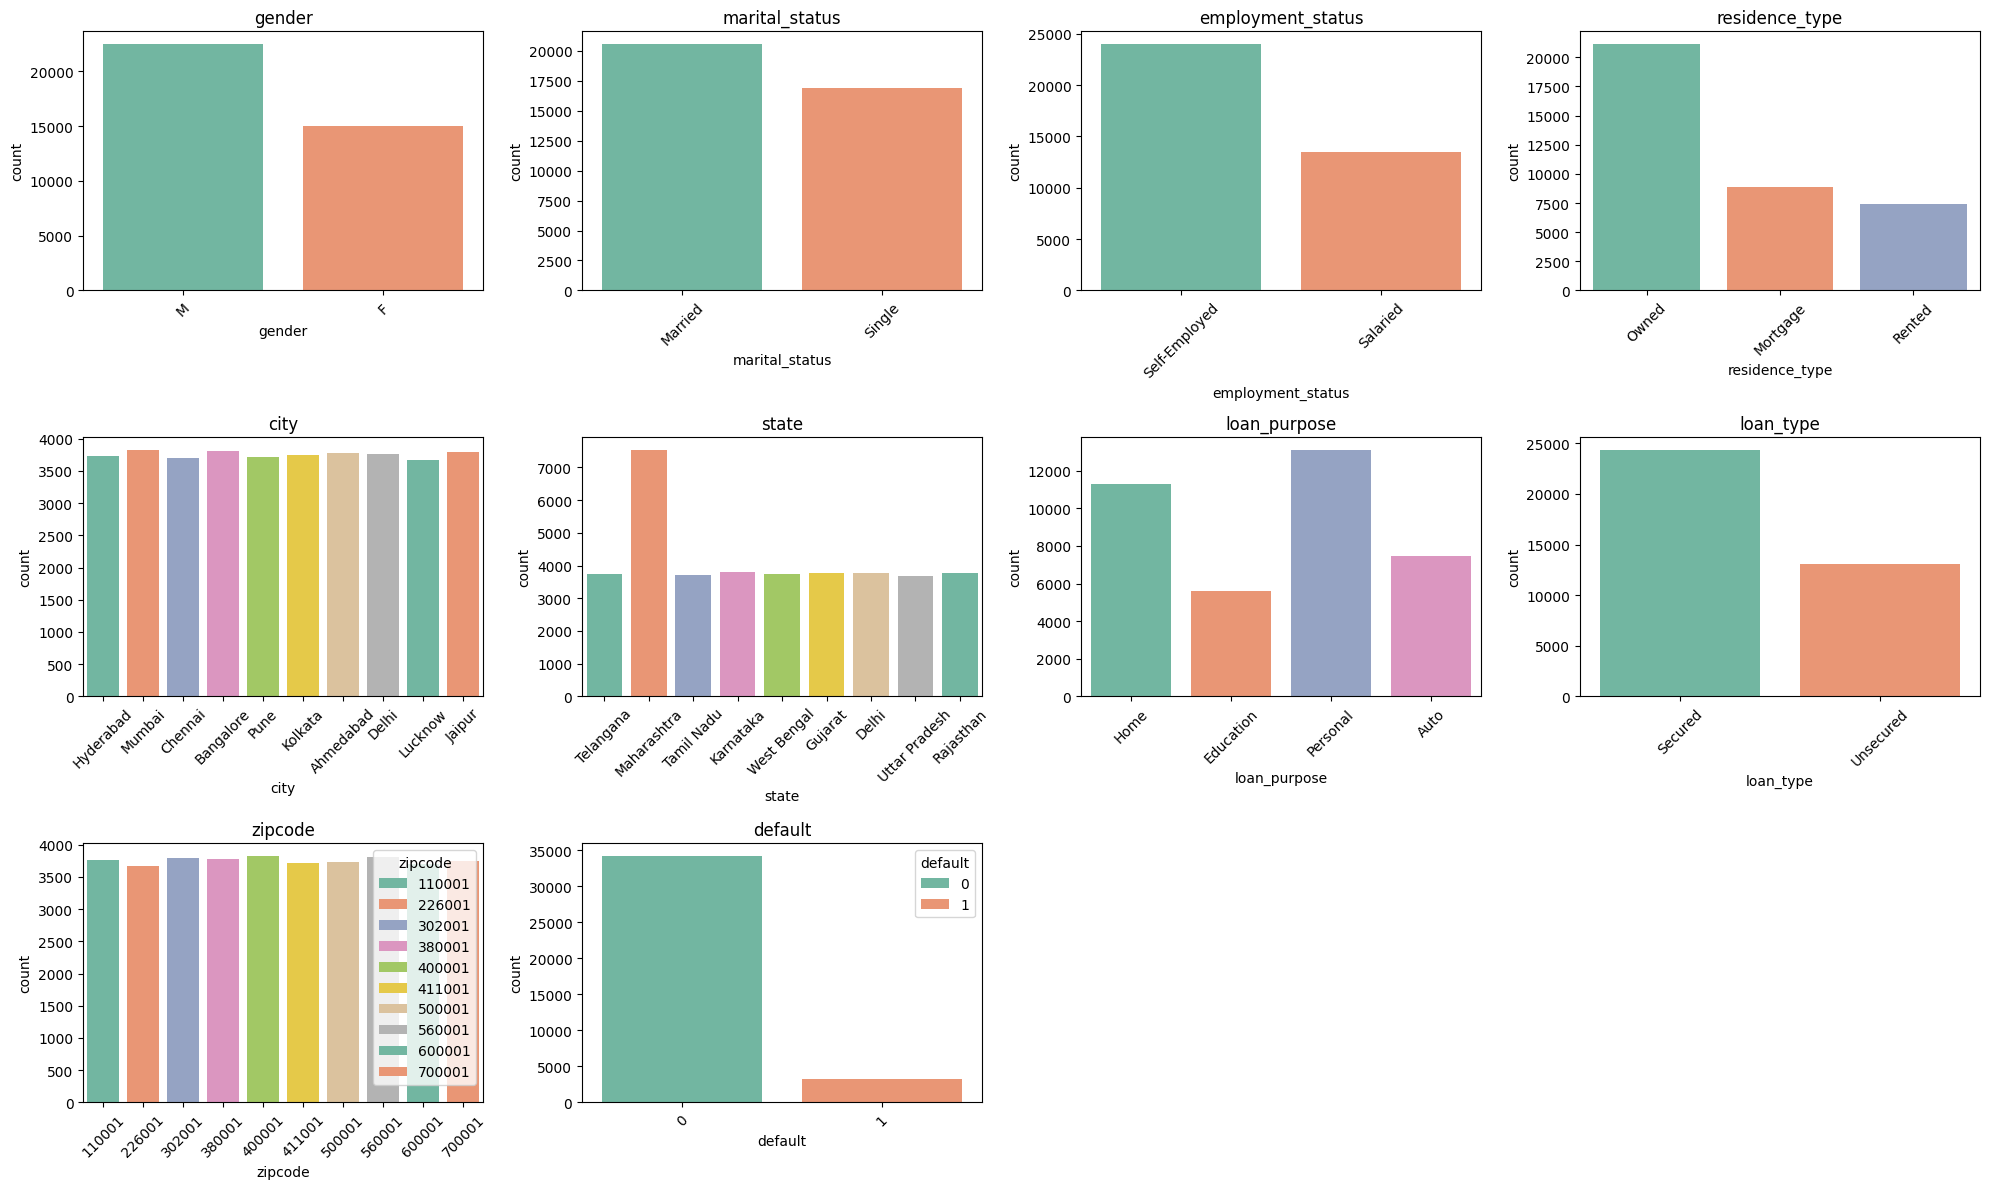

In [110]:
n_cols = 4
n_rows = math.ceil(len(categorical_columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_train_1, x=col,hue=col,palette="Set2")
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(
    "Distribution_categorical_columns.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

#### Feature Engineering

#### Generate Loan to Income Ratio (LTI)

In [149]:
df_train_1['loan_to_income'] = (df_train_1['loan_amount'] / df_train_1['income']).round(2)

In [150]:
df_train_1['loan_to_income'].head(3)

12746   2.07
32495   1.61
43675   3.54
Name: loan_to_income, dtype: float64

In [151]:
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [152]:
# Apply same process to df_test_1

df_test_1['loan_to_income'] = (df_test_1['loan_amount'] / df_test_1['income']).round(2)

##### KDE plot of loan_to_income

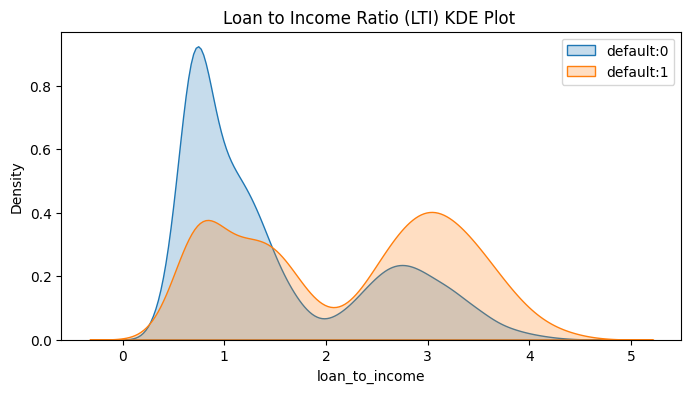

In [164]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']== 0],fill = True,label='default:0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']== 1],fill = True,label = 'default:1')
plt.legend()
plt.title(f"Loan to Income Ratio (LTI) KDE Plot ")
plt.show()

- **Loan-to-Income (LTI) Ratio**:  
  The risk of default **increases significantly when the Loan-to-Income ratio approaches or exceeds ~2.5**.  
  This suggests that borrowers taking loans that are large relative to their income face higher repayment stress.

- **Loan-to-Value (LTV) Ratio**:  
  When the **Loan-to-Value ratio is low**, the risk of default is **very minimal**.  
  This indicates that borrowers with higher equity or lower leverage tend to demonstrate stronger repayment behavior.


#### Generate Delinquency Ratio

##### Delinquency Ratio

The **Delinquency Ratio** is a credit risk metric that represents the **proportion of time a borrower failed to make payments on schedule**.

Delinquency Ratio = Number of Delinquent Months/Total Loan Months



In [166]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)

In [167]:
df_test_1['delinquency_ratio'] = (df_test_1['delinquent_months']*100 / df_test_1['total_loan_months']).round(1)

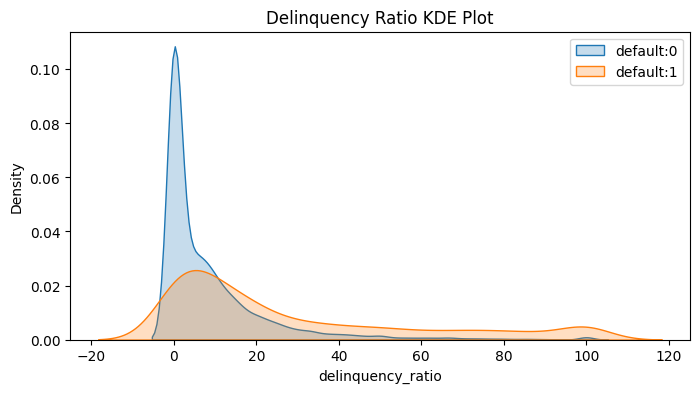

In [168]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default:0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default:1')
plt.title(f"Delinquency Ratio KDE Plot")
plt.legend()
plt.show()

#### Delinquency Ratio – KDE Plot Analysis

The KDE plot for the **Delinquency Ratio** compares the distribution of delinquency behavior between **defaulters and non-defaulters**.

##### 🔍 Key Observations
- The distribution for **non-defaulters** is heavily concentrated near **0**, indicating that most borrowers with no or minimal delinquency do not default.
- **Defaulters** show a **right-shifted distribution**, with higher delinquency ratio values occurring more frequently.
- As the **Delinquency Ratio increases**, the separation between defaulters and non-defaulters becomes more pronounced.
- There is **limited overlap** between the two curves at higher delinquency ratios, suggesting strong predictive power.

##### 🎯 Credit Risk Interpretation
- A **low delinquency ratio** corresponds to **low default risk**.
- A **high delinquency ratio** is a strong indicator of **repayment stress and elevated default risk**.


### Generate Avg DPD Per Delinquency

#### Avg DPD per Delinquency

**Avg DPD per Delinquency** is a credit risk metric that measures the **average severity of late payments when delinquency occurs**.

Avg DPD per Delinquency =
Total Days Past Due (DPD)/Number of Delinquent Months

This metric helps distinguish between borrowers who are delinquent **frequently with short delays** and those who are delinquent **less frequently but for longer durations**, making it a strong indicator of repayment stress and default risk.


In [172]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months'] != 0,
    (df_test_1['total_dpd'] / df_test_1['delinquent_months']).round(1),
    0
)

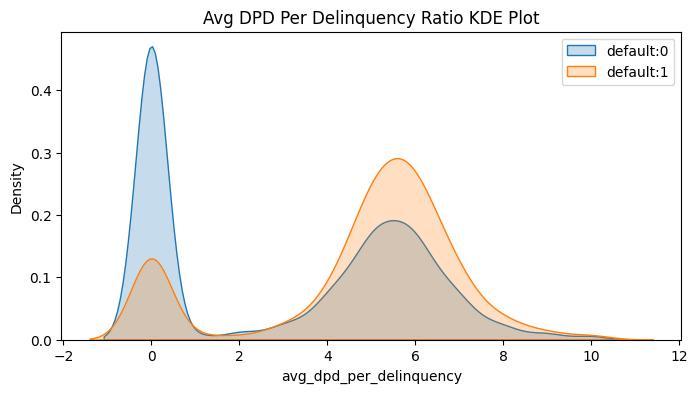

In [173]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default:0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default:1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot")
plt.legend()
plt.show()

#### Key Observations
- **Non-defaulters** show a strong concentration at **lower Avg DPD values**, indicating that when delays occur, they are typically short-lived.
- **Defaulters** exhibit a **right-shifted distribution**, with higher Avg DPD values occurring more frequently.
- As Avg DPD per Delinquency increases, the **overlap between the two distributions reduces**, highlighting strong risk separation.
- Higher Avg DPD values are associated with **prolonged repayment delays**, which significantly increase default likelihood.

#### Credit Risk Interpretation
- **Lower Avg DPD per Delinquency** corresponds to **lower default risk**.
- **Higher Avg DPD per Delinquency** indicates **severe delinquency behavior** and elevated credit risk.



#### Removal of columns which donot influence target variable

In [174]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'age_bin', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

The variables `cust_id` and `loan_id` are **unique identifiers** and do not carry any predictive information related to the target variable.  
Including them may introduce noise without adding modeling value.  

Therefore, these columns are **dropped from further analysis and model development**.


In [177]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'],axis = 'columns')

In [178]:
df_test_2 = df_test_1.drop(['cust_id','loan_id'],axis = 'columns')

#### Removal of Business-Excluded Columns

Certain columns have been removed from the dataset based on guidance from the **business contact person**, as they are **not required for analysis or model development**.  
This ensures alignment with business requirements and focuses the model on relevant predictive features.


In [183]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test_3 = df_test_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'age_bin', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

#### Multicollinearity Assessment

#### Method 1: VIF (Variance Inflation Factor)

In [184]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          37488 non-null  int64   
 1   gender                       37488 non-null  object  
 2   marital_status               37488 non-null  object  
 3   employment_status            37488 non-null  object  
 4   number_of_dependants         37488 non-null  int64   
 5   residence_type               37488 non-null  object  
 6   years_at_current_address     37488 non-null  int64   
 7   city                         37488 non-null  object  
 8   state                        37488 non-null  object  
 9   zipcode                      37488 non-null  int64   
 10  loan_purpose                 37488 non-null  object  
 11  loan_type                    37488 non-null  object  
 12  sanction_amount              37488 non-null  int64   
 13  pr

In [188]:
col_to_scale = [
    col for col in df_train_3.select_dtypes(['int64','float64']).columns
    if col != 'default'
]

In [189]:
col_to_scale

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [262]:
# VIF Calculation

X_train = df_train_3.drop('default',axis = 1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])
X_train.describe()

# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[col_to_scale]),columns = col_to_scale,index= X_train.index)
# X_train_scaled.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.414,0.389,0.500,0.524,0.089,0.083,0.083,0.083,0.377,0.262,0.124,0.501,0.501,0.501,0.439,0.294,0.103,0.328
std,0.190,0.307,0.297,0.286,0.120,0.112,0.112,0.112,0.235,0.244,0.133,0.373,0.407,0.254,0.297,0.228,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.404,0.400,0.500,0.492,0.049,0.046,0.046,0.046,0.340,0.194,0.083,0.667,0.500,0.500,0.394,0.201,0.037,0.430
75%,0.538,0.600,0.767,0.763,0.098,0.096,0.096,0.096,0.547,0.352,0.155,1.000,1.000,0.625,0.677,0.506,0.129,0.573
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [257]:
X_train_scaled.head()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,0.600,0.967,0.661,0.634,0.490,0.490,0.490,0.415,1.000,0.613,1.000,1.000,0.375,0.364,0.415,0.132,0.590
32495,0.500,0.000,0.867,0.492,0.021,0.023,0.023,0.023,0.830,0.087,0.025,0.667,0.500,0.500,0.051,0.307,0.062,0.620
43675,0.385,0.000,0.833,0.831,0.218,0.235,0.235,0.235,0.491,0.327,0.174,0.000,0.500,0.375,0.000,0.759,0.222,0.560
9040,0.462,0.400,0.967,0.763,0.043,0.034,0.034,0.034,0.642,0.199,0.078,0.667,0.000,0.875,0.879,0.194,0.000,0.000
13077,0.769,0.800,0.933,0.510,0.021,0.018,0.018,0.018,0.170,0.124,0.072,0.000,1.000,0.000,0.717,0.047,0.000,0.000


##### Apply the above transformation on test data

In [264]:
X_test = df_test_3.drop('default', axis='columns')
y_test = df_test_3['default']

X_test[col_to_scale] = scaler.transform(X_test[col_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000
mean,0.415,0.385,0.503,0.525,0.089,0.083,0.083,0.083,0.375,0.265,0.125,0.497,0.500,0.501,0.436,0.293,0.106,0.334
std,0.189,0.307,0.298,0.286,0.121,0.113,0.113,0.113,0.234,0.245,0.135,0.373,0.407,0.254,0.295,0.226,0.173,0.290
min,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.080,0.034,0.000,0.000,0.375,0.182,0.112,0.000,0.000
50%,0.423,0.400,0.500,0.510,0.050,0.046,0.046,0.046,0.340,0.198,0.084,0.333,0.500,0.500,0.394,0.201,0.042,0.440
75%,0.538,0.600,0.767,0.763,0.097,0.095,0.095,0.095,0.547,0.357,0.158,0.667,1.000,0.625,0.677,0.499,0.134,0.580
max,1.000,1.000,1.000,1.000,0.981,0.964,0.964,0.964,1.000,1.000,0.939,1.000,1.000,1.000,1.000,1.005,1.000,1.000


In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df


In [273]:
calculate_vif(X_train[col_to_scale])

C:\Users\Ashok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.701
1,number_of_dependants,2.730
2,years_at_current_address,3.423
3,zipcode,3.798
4,sanction_amount,101.087
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.181
9,principal_outstanding,16.326


Multicollinearity was assessed using Variance Inflation Factor (VIF).
Variables with extremely high or infinite VIF values—primarily loan amount and fee-derived features—were removed due to strong linear dependence.
Remaining variables exhibit acceptable VIF levels and were retained based on predictive strength and business interpretability.


In [288]:
features_to_drop = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop, axis='columns')

numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [289]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'age_bin', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [290]:
calculate_vif(X_train_1[numeric_columns])

,Column,VIF
0,age,5.429
1,number_of_dependants,2.727
2,years_at_current_address,3.404
3,zipcode,3.778
4,loan_tenure_months,6.019
5,bank_balance_at_application,1.805
6,number_of_open_accounts,4.353
7,number_of_closed_accounts,2.372
8,enquiry_count,6.384
9,credit_utilization_ratio,2.920


In [291]:
selected_numeric_features_vif = calculate_vif(X_train_1[numeric_columns]).Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [292]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

#### Correlation Matrix

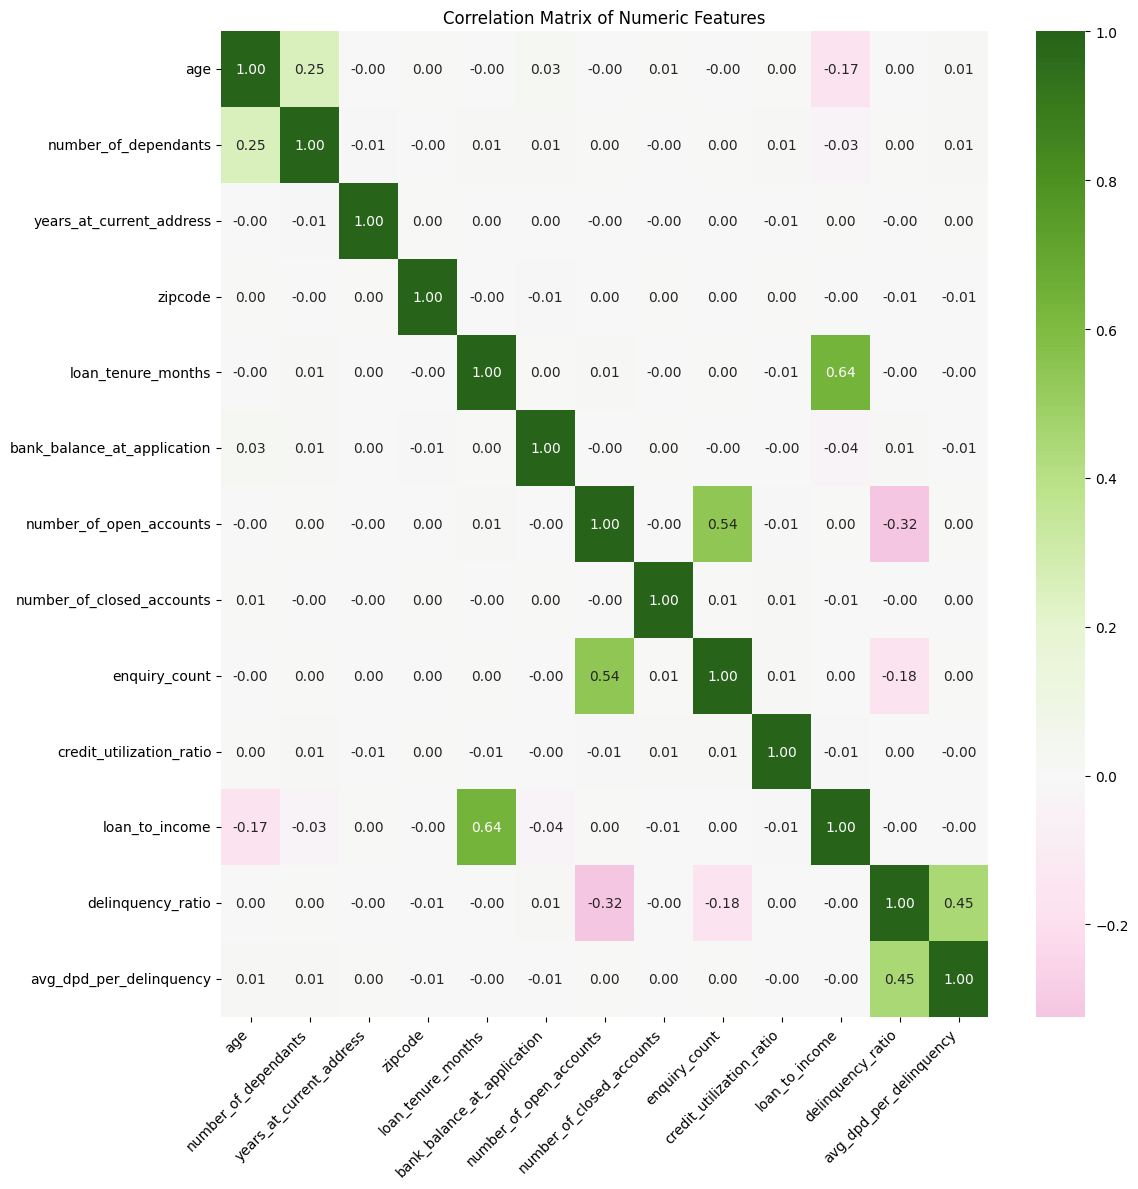

In [293]:
corr = df_train_3[numeric_columns].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(
    corr,
    annot=True,
    cmap='PiYG',
    center=0,
    fmt=".2f"
)
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.savefig(
    "Correlation_Matrix_Numeric_Features.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


#### Feature Selection for Categorical Features

In [299]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,M,Married,Self-Employed,0.600,Owned,0.967,Hyderabad,Telangana,0.661,...,Secured,0.415,0.613,1.000,1.000,0.375,0.364,0.415,0.132,0.590
32495,0.500,F,Single,Salaried,0.000,Owned,0.867,Mumbai,Maharashtra,0.492,...,Secured,0.830,0.025,0.667,0.500,0.500,0.051,0.307,0.062,0.620
43675,0.385,M,Single,Salaried,0.000,Mortgage,0.833,Chennai,Tamil Nadu,0.831,...,Secured,0.491,0.174,0.000,0.500,0.375,0.000,0.759,0.222,0.560
9040,0.462,M,Married,Salaried,0.400,Mortgage,0.967,Bangalore,Karnataka,0.763,...,Secured,0.642,0.078,0.667,0.000,0.875,0.879,0.194,0.000,0.000
13077,0.769,M,Married,Self-Employed,0.800,Owned,0.933,Pune,Maharashtra,0.510,...,Unsecured,0.170,0.072,0.000,1.000,0.000,0.717,0.047,0.000,0.000


#### Weight of Evidence and Information Value
The Weight of Evidence (WOE) tells the predictive power of an independent variable in relation to the dependent variable. It is generally described as a measure of the separation of good and bad customers.
Information value (IV) is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

- **Weight of Evidence (WoE):**  
  WoE measures the predictive power of a feature by quantifying how well it separates “good” borrowers (non-default) from “bad” borrowers (default).  
  Each category of a feature is assigned a WoE value based on its distribution of good vs bad cases.

- **Information Value (IV):**  
  IV summarizes the predictive strength of the entire feature. Higher IV indicates stronger ability to differentiate between good and bad borrowers. IV is widely used in credit scoring and risk modeling to select relevant features.

**Formulas:**

1. **Weight of Evidence (WoE) for category \(i\):**


$$\text{WOE} = \ln\left(\frac{\text{Distr. Good}_i}{\text{Distr. Bad}_i}\right) = \ln\left(\frac{\% \text{ of Good}_i}{\% \text{ of Bad}_i}\right)$$


2. **Information Value (IV) for a feature:**

The Information Value (IV) for a feature is calculated by summing the Weight of Evidence (WoE) multiplied by the difference between the percentage of events and non-events for each bin.

$$IV = \sum_{i=1}^{N} (\% \text{ of Events}_i - \% \text{ of Non-Events}_i) \times \text{WoE}_i$$


**Interpretation of IV:**

| IV Value | Predictive Power |
|----------|----------------|
| < 0.02   | Not predictive |
| 0.02–0.1 | Weak predictor |
| 0.1–0.3  | Medium predictor |
| > 0.3    | Strong predictor |


In [300]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101,0.208,-0.717,0.076
Education,5620,559,5061,0.173,0.148,0.161,0.004
Home,11304,1734,9570,0.538,0.279,0.656,0.170
Personal,13117,603,12514,0.187,0.365,-0.669,0.119


In [302]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [303]:
# Calculation of IV

iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [304]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


##### Select features with IV > 0.02

In [305]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

Features with Information Value (IV) greater than 0.02 were selected for further modeling, as they demonstrate meaningful predictive power.


#### Feature Encoding

In [313]:
X_train_selected_features = X_train_1[selected_features_iv]
X_test_selected_features = X_test[selected_features_iv]

In [314]:
X_train_encoded = pd.get_dummies(X_train_selected_features,drop_first=True)

In [315]:
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


In [316]:
X_test_encoded = pd.get_dummies(X_test_selected_features,drop_first=True)

In [318]:
X_test_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False
35347,0.365,0.755,1.000,0.485,0.571,0.024,0.700,True,False,False,True,False,False
41814,0.577,0.717,0.667,0.980,0.407,0.107,0.640,False,False,False,True,False,False


### Model Training

#### Strategy 1 :
I will start with 

1. Logistic Regression 

2. Random Forest

3. XGBoost

without handling of class imbalance.

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

1. Logistic Regression

In [322]:
model=LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)

In [325]:
report = classification_report(y_test,y_pred)
print(f"Classification Report:\n {report}")

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Interpretation:

- When the model predicts default, it is correct 85% of the time.
- However, it only detects 72% of actual defaulters.
- Around 28% of defaulters are being missed.

In credit risk modeling, **recall for defaulters is critical**, because missing a defaulter can result in financial loss.

The model is good, but improving recall for Class 1 would make it more robust for credit risk applications.

##### Feature Importance - Logistic Regression

In [327]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [329]:
model.coef_[0]

array([-0.5305489 ,  0.39827838,  0.63575649, 12.64595158, 10.68629395,
        9.44033594,  1.97014437, -1.46797958,  1.44467998,  0.99305153,
       -1.38471047,  0.63881817,  0.63881817])

In [331]:
feature_importance_df = pd.DataFrame(
    {"Features": X_train_encoded.columns,
    "Coefficients" : model.coef_[0]}
                                    )
feature_importance_df.head()

,Features,Coefficients
0,age,-0.531
1,loan_tenure_months,0.398
2,number_of_open_accounts,0.636
3,credit_utilization_ratio,12.646
4,loan_to_income,10.686


In [334]:
feature_importance_df = feature_importance_df.sort_values(by= 'Coefficients',ascending= True)

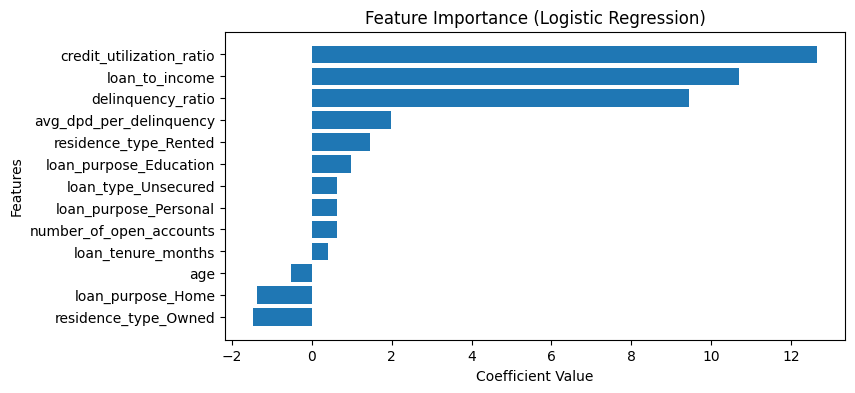

In [340]:
plt.figure(figsize= (8,4))
plt.barh(feature_importance_df.Features, feature_importance_df.Coefficients )

plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (Logistic Regression)")

plt.savefig(
    "Feature_Importance_Logistic Regression.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

2. Random Forest

In [343]:
from sklearn.ensemble import RandomForestClassifier
model_rand=RandomForestClassifier()
model_rand.fit(X_train_encoded,y_train)

y_pred_rand = model_rand.predict(X_test_encoded)

In [344]:
report = classification_report(y_test,y_pred_rand)
print(f"Classification Report:\n {report}")

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



##### Feature Importance - Random Forest

In [346]:
feature_importance_df_rand = pd.DataFrame(
    {"Features": X_train_encoded.columns,
    "Coefficients" : model_rand.feature_importances_}
                                    )
feature_importance_df_rand.head()

,Features,Coefficients
0,age,0.062
1,loan_tenure_months,0.062
2,number_of_open_accounts,0.024
3,credit_utilization_ratio,0.404
4,loan_to_income,0.124


In [347]:
feature_importance_df_rand = feature_importance_df_rand.sort_values(by= 'Coefficients',ascending= True)

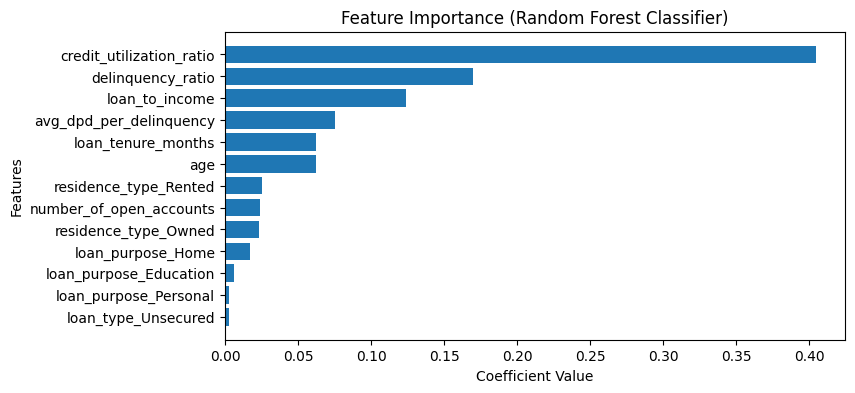

In [348]:
plt.figure(figsize= (8,4))
plt.barh(feature_importance_df_rand.Features, feature_importance_df_rand.Coefficients )

plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest Classifier)")

plt.savefig(
    "Feature_Importance_Random_Forest.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

3. XGBoost

In [349]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_encoded,y_train)

y_pred_xgb = model_xgb.predict(X_test_encoded)

In [350]:
report = classification_report(y_test,y_pred_xgb)
print(f"Classification Report:\n {report}")

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



##### Feature Importance - XGBoost

In [351]:
feature_importance_df_xgb = pd.DataFrame(
    {"Features": X_train_encoded.columns,
    "Coefficients" : model_xgb.feature_importances_}
                                    )
feature_importance_df_xgb.head()

,Features,Coefficients
0,age,0.016
1,loan_tenure_months,0.018
2,number_of_open_accounts,0.020
3,credit_utilization_ratio,0.236
4,loan_to_income,0.084


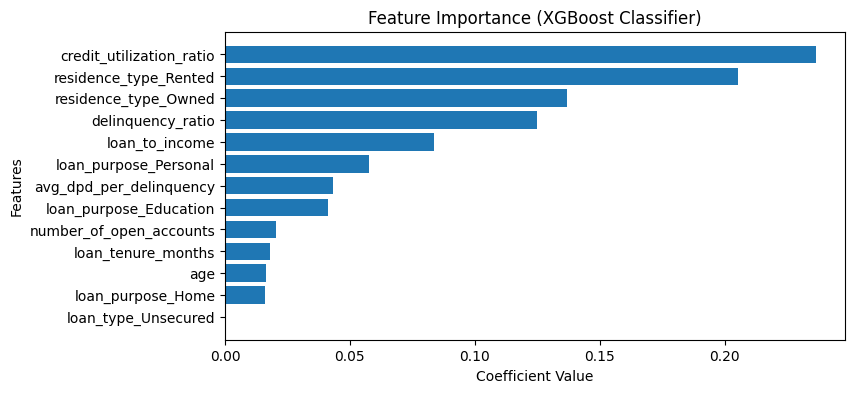

In [352]:
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by= 'Coefficients',ascending= True)

plt.figure(figsize= (8,4))
plt.barh(feature_importance_df_xgb.Features, feature_importance_df_xgb.Coefficients )

plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost Classifier)")

plt.savefig(
    "Feature_Importance_XGBoost.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

#### Final Model Comparison

#####  Class Distribution

- Non-Default (Class 0): 11,423  
- Default (Class 1): 1,074  
- Total Observations: 12,497  
- Default Rate: ~8.6%  

The dataset is imbalanced, making recall for defaulters a critical evaluation metric.

---

#### Interpretation

##### 1️⃣ Logistic Regression

- Highest precision for defaulters (0.85)
- Lower recall (0.72)
- Misses more defaulters (28%)
- Highly interpretable
- Industry-standard model in credit risk

✅ Best for regulatory and explainability requirements  
⚠ May miss some high-risk customers  

---

##### 2️⃣ Random Forest

- Lower recall (0.71)
- Similar precision (0.85)
- Similar accuracy (0.96)
 
⚠ Less interpretable than Logistic Regression  

---

##### 3️⃣ XGBoost

- Similar recall to Logistic Regression (0.76)
- Strong overall predictive performance
- Excellent for complex patterns

✅ Strong predictive performance  
⚠ Requires additional tools for explainability  

---

####  Business Perspective

In credit risk modeling:

- Missing a defaulter = Financial loss  
- Rejecting a good customer = Opportunity loss  

Therefore, **recall for Class 1 (defaulters)** is often more important than overall accuracy.

XGBoost improve defaulter detection compared to Logistic Regression.

---

####  Final Recommendation

- Logistic Regression should be used as the baseline model due to interpretability.
- For purely predictive performance, XGBoost performs slightly better.
- For regulatory environments requiring transparency, Logistic Regression remains preferred.


### Hyperparameter Tuning

#### 1. Logistic Regression – RandomizedSearchCV

In [354]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],  
}

log_reg = LogisticRegression(max_iter=10000)

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=40,
    scoring='f1',  
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_encoded, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'solver': 'saga', 'C': np.float64(206.913808111479)}
Best CV Score: 0.7584680952895995
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### 2. XGBoost – RandomizedSearchCV

In [357]:
# Hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10]
}
xgb = XGBClassifier()

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,                 
    scoring='f1',              
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_encoded, y_train)

# Best parameters
print("Best Parameters:", random_search_xgb.best_params_)
print("Best CV Score:", random_search_xgb.best_score_)

# Evaluate on test data
best_xgb_model = random_search_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best CV Score: 0.7889241959475063
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.97     12497



#### Strategy 2 :


1. Logistic Regression

2. XGBoost

##### with handling of class imbalance.

#### Handling class imbalance using Undersampling 

In [358]:
from imblearn.under_sampling import RandomUnderSampler

In [360]:
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to training data only
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)

print("Original class distribution:")
print(y_train.value_counts())

print("\nAfter undersampling:")
print(y_train_rus.value_counts())

Original class distribution:
default
0    34265
1     3223
Name: count, dtype: int64

After undersampling:
default
0    3223
1    3223
Name: count, dtype: int64


##### Logistic Regression with Undersampling

In [361]:
log_reg = LogisticRegression()

log_reg.fit(X_train_rus,y_train_rus)

y_pred_lg_rus = log_reg.predict(X_test_encoded)

report = classification_report(y_test, y_pred_lg_rus)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



##### XGBoost with Undersampling

In [363]:
xgb_rus = XGBClassifier(**random_search_xgb.best_params_)
xgb_rus.fit(X_train_rus, y_train_rus)

y_pred_xgb_rus = xgb_rus.predict(X_test_encoded)
report = classification_report(y_test, y_pred_xgb_rus)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.55      0.98      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.95      0.83     12497
weighted avg       0.96      0.93      0.94     12497



#### Strategy 3 :

Logistic Regression

with handling of class imbalance- OverSampling

Hyperparameter Optimization using Optuna

#### Handling class imbalance using Oversampling

##### 1. Using SMOTE

In [364]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before sampling
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_encoded, y_train
)

# After sampling
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 34265, 1: 3223})
After SMOTE: Counter({0: 34265, 1: 34265})


##### Logistic Regression with SMOTE

In [366]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



##### Logistic Regression Using SMOTE Tomek

In [368]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [369]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



####  Hyperparameter Optimization using Optuna

In [370]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

C:\Users\Ashok\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [371]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2026-02-17 15:40:12,535] A new study created in memory with name: no-name-a9e627e7-68ce-439a-b4f3-eea9b7312d88
[I 2026-02-17 15:40:14,540] Trial 0 finished with value: 0.9456354327232822 and parameters: {'C': 64.39965208509854, 'solver': 'saga', 'tol': 2.3692694422562533e-05, 'class_weight': None}. Best is trial 0 with value: 0.9456354327232822.
[I 2026-02-17 15:40:16,089] Trial 1 finished with value: 0.9455614762305081 and parameters: {'C': 7.040625906563879, 'solver': 'lbfgs', 'tol': 0.0006741980858666606, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456354327232822.
[I 2026-02-17 15:40:19,142] Trial 2 finished with value: 0.9439428223968771 and parameters: {'C': 0.2781105958545384, 'solver': 'lbfgs', 'tol': 0.0001586572745965533, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456354327232822.
[I 2026-02-17 15:40:22,335] Trial 3 finished with value: 0.9457027259959222 and parameters: {'C': 3.962546652021439, 'solver': 'liblinear', 'tol': 0.0161407216793

In [372]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9458681822051008
  Params: 
    C: 5.728474101282252
    solver: lbfgs
    tol: 0.0007376131694042587
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



#### Strategy 4 :

##### XGBoost

with handling of class imbalance- OverSampling

Hyperparameter Optimization using Optuna

In [374]:
smote = SMOTE(random_state=42)

X_train_over, y_train_over = smote.fit_resample(X_train_encoded, y_train)

print("Original distribution:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_over).value_counts())

Original distribution:
default
0    34265
1     3223
Name: count, dtype: int64

After SMOTE:
default
0    34265
1    34265
Name: count, dtype: int64


In [375]:
xgb_over = XGBClassifier(**random_search_xgb.best_params_)
xgb_over.fit(X_train_over, y_train_over)

y_pred_xgb_over = xgb_over.predict(X_test_encoded)
report = classification_report(y_test, y_pred_xgb_over)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.66      0.90      0.76      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.93      0.87     12497
weighted avg       0.96      0.95      0.96     12497



In [376]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_over, y_train_over, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2026-02-18 15:11:52,372] A new study created in memory with name: no-name-168737e9-9c6f-4fa7-b00d-bfe7c83e68f7
[I 2026-02-18 15:12:00,747] Trial 0 finished with value: 0.9705966764638895 and parameters: {'lambda': 0.12850928869669326, 'alpha': 1.707448951569993, 'subsample': 0.9105978502741158, 'colsample_bytree': 0.5747723011087126, 'max_depth': 7, 'eta': 0.23279052953045024, 'gamma': 2.8872357241598268, 'scale_pos_weight': 2.6558267089327816, 'min_child_weight': 5, 'max_delta_step': 5}. Best is trial 0 with value: 0.9705966764638895.
[I 2026-02-18 15:12:06,542] Trial 1 finished with value: 0.9604769126834724 and parameters: {'lambda': 5.4362357180517895, 'alpha': 0.030721275252646365, 'subsample': 0.44450628838889805, 'colsample_bytree': 0.5616787951548838, 'max_depth': 7, 'eta': 0.1832785150244365, 'gamma': 6.000186058708682, 'scale_pos_weight': 4.1258422512782245, 'min_child_weight': 10, 'max_delta_step': 7}. Best is trial 0 with value: 0.9705966764638895.
[I 2026-02-18 15:12:13

In [377]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_over, y_train_over)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9749846400461322
  Params: 
    lambda: 0.002466755776420886
    alpha: 0.010124595282146978
    subsample: 0.9084302175952733
    colsample_bytree: 0.5983386965363443
    max_depth: 10
    eta: 0.18267806462977149
    gamma: 0.3090489927609731
    scale_pos_weight: 1.056824460741455
    min_child_weight: 10
    max_delta_step: 3
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.84      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In this credit risk modeling project, the primary business objective is to **maximize recall for the default class (Class 1)**.

In lending, a **False Negative (FN)** represents a high-risk customer incorrectly classified as low-risk.  
This leads to:

- Credit losses  
- Increased Non-Performing Assets (NPAs)  
- Higher provisioning requirements  
- Regulatory and capital risk  

Therefore, minimizing missed defaulters is more important than maximizing overall accuracy.

Although XGBoost achieved higher overall accuracy and F1-score, Logistic Regression demonstrated significantly higher recall for the default class.

This means Logistic Regression misses fewer high-risk borrowers, directly reducing potential financial losses.

The trade-off:
- Lower precision (more good customers may be rejected)
- Slightly lower overall accuracy

However, given the stated business objective of prioritizing risk containment over portfolio growth, this trade-off is acceptable.

#### Model Evaluation: Performance Metric- ROC-AUC

##### Best Model Logistic Regression

In [378]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [381]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [380]:
y_probs = best_model_logistic.predict_proba(X_test_encoded)[:,1]

roc_auc = roc_auc_score(y_test, y_probs) # ROC-Auc Score
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

fpr[:5], tpr[:5], thresholds[:5]

ROC-AUC Score: 0.9837587956344733


(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.17690875, 0.17690875, 0.17970205]),
 array([       inf, 1.        , 0.99929676, 0.99929116, 0.99926289]))

In [382]:
# Calculate area under curve
area = auc(fpr, tpr)
print("ROC-AUC (Area):", area)

ROC-AUC (Area): 0.9837587956344733


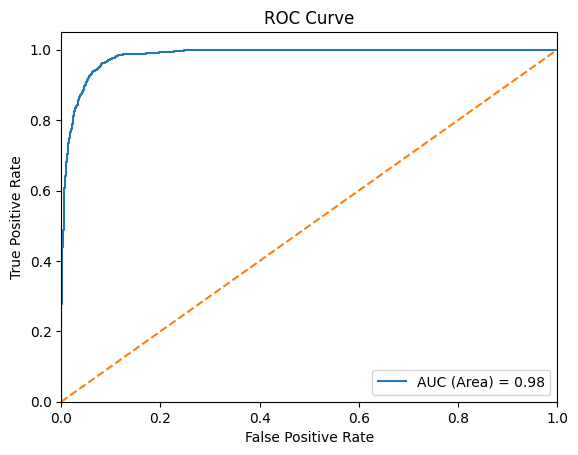

In [386]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC (Area) = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Rank Ordering, Gini Coefficient, and KS Statistics

#### 1. Rank Ordering (Decile Analysis)

In [408]:
y_probs = best_model_logistic.predict_proba(X_test_encoded)[:, 1]

# Create evaluation dataframe
df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Prob': y_probs
})

df_eval.head(3)

,Default Truth,Default Prob
19205,0,0.551
15514,0,0.000
30367,0,0.006


Customers are sorted based on predicted probability of default and divided into 10 equal-sized groups (deciles).

Decile 1 → Lowest Risk

Decile 10 → Highest Risk

In [411]:
# Create deciles (10 buckets)

df_eval['decile'] = pd.qcut(df_eval['Default Prob'],10,labels=False,duplicates = 'drop')

In [412]:
df_eval.head(3)

,Default Truth,Default Prob,decile
19205,0,0.551,8
15514,0,0.000,2
30367,0,0.006,6


In [413]:
df_decile = df_eval.groupby('decile').agg(
    total=('Default Truth', 'count'),
    defaults=('Default Truth', 'sum')
).reset_index()

In [414]:
df_decile.head()

,decile,total,defaults
0,0,1250,0
1,1,1250,0
2,2,1249,0
3,3,1250,0
4,4,1250,0


In [415]:
df_decile['non_defaults'] = df_decile['total'] - df_decile['defaults']
df_decile['default_rate'] = df_decile['defaults'] / df_decile['total']

# Reverse order so Decile 1 = Highest Risk
df_decile = df_decile.sort_index(ascending=False).reset_index(drop=True)
df_decile.index = df_decile.index + 1

print(df_decile)

    decile  total  defaults  non_defaults  default_rate
1        9   1250       901           349         0.721
2        8   1250       159          1091         0.127
3        7   1249         9          1240         0.007
4        6   1250         5          1245         0.004
5        5   1249         0          1249         0.000
6        4   1250         0          1250         0.000
7        3   1250         0          1250         0.000
8        2   1249         0          1249         0.000
9        1   1250         0          1250         0.000
10       0   1250         0          1250         0.000


In [417]:
#df_eval = df_eval.sort_values('Default Prob', ascending=True).reset_index(drop=True)


In [422]:
df_eval['decile'] = pd.qcut(
    df_eval['Default Prob'],
    10,
    labels=False,
    duplicates='drop'
)

# Convert 0–9 to 1–10
df_eval['decile'] = df_eval['decile'] + 1

In [425]:
# Aggregate
decile_table = df_eval.groupby('decile').agg(
    total=('Default Truth', 'count'),
    defaults=('Default Truth', 'sum')
).reset_index()

# Non-defaults
decile_table['non_defaults'] = decile_table['total'] - decile_table['defaults']

# Sort in natural order (1 → 10)
decile_table = decile_table.sort_values('decile',ascending=False).reset_index(drop=True)

decile_table

,decile,total,defaults,non_defaults
0,10,1250,901,349
1,9,1250,159,1091
2,8,1249,9,1240
3,7,1250,5,1245
4,6,1249,0,1249
5,5,1250,0,1250
6,4,1250,0,1250
7,3,1249,0,1249
8,2,1250,0,1250
9,1,1250,0,1250


In [ ]:
# Totals
total_defaults = decile_table['defaults'].sum()
total_non_defaults = decile_table['non_defaults'].sum()

In [426]:
# Distribution per decile
decile_table['default_rate'] = decile_table['defaults'] *100/ (decile_table['defaults'] + decile_table['non_defaults'] )
decile_table['non_default_rate'] = decile_table['non_defaults']*100 / (decile_table['defaults'] + decile_table['non_defaults'] )

decile_table

,decile,total,defaults,non_defaults,default_rate,non_default_rate
0,10,1250,901,349,72.080,27.920
1,9,1250,159,1091,12.720,87.280
2,8,1249,9,1240,0.721,99.279
3,7,1250,5,1245,0.400,99.600
4,6,1249,0,1249,0.000,100.000
5,5,1250,0,1250,0.000,100.000
6,4,1250,0,1250,0.000,100.000
7,3,1249,0,1249,0.000,100.000
8,2,1250,0,1250,0.000,100.000
9,1,1250,0,1250,0.000,100.000


In [428]:
# Cumulative defaults and non-defaults

decile_table['cum_default'] = decile_table['defaults'].cumsum()
decile_table['cum_non_default'] = decile_table['non_defaults'].cumsum()

decile_table

,decile,total,defaults,non_defaults,default_rate,non_default_rate,cum_default,cum_non_default
0,10,1250,901,349,72.080,27.920,901,349
1,9,1250,159,1091,12.720,87.280,1060,1440
2,8,1249,9,1240,0.721,99.279,1069,2680
3,7,1250,5,1245,0.400,99.600,1074,3925
4,6,1249,0,1249,0.000,100.000,1074,5174
5,5,1250,0,1250,0.000,100.000,1074,6424
6,4,1250,0,1250,0.000,100.000,1074,7674
7,3,1249,0,1249,0.000,100.000,1074,8923
8,2,1250,0,1250,0.000,100.000,1074,10173
9,1,1250,0,1250,0.000,100.000,1074,11423


In [431]:
# Cumulative default rate and non-default rate


decile_table['cum_default_rate']=decile_table['cum_default']*100 / decile_table['defaults'].sum()
decile_table['cum_non_default_rate']=decile_table['cum_non_default']*100 / decile_table['non_defaults'].sum()


decile_table

,decile,total,defaults,non_defaults,default_rate,non_default_rate,cum_default,cum_non_default,cum_default_rate,cum_non_default_rate
0,10,1250,901,349,72.080,27.920,901,349,83.892,3.055
1,9,1250,159,1091,12.720,87.280,1060,1440,98.696,12.606
2,8,1249,9,1240,0.721,99.279,1069,2680,99.534,23.461
3,7,1250,5,1245,0.400,99.600,1074,3925,100.000,34.361
4,6,1249,0,1249,0.000,100.000,1074,5174,100.000,45.295
5,5,1250,0,1250,0.000,100.000,1074,6424,100.000,56.237
6,4,1250,0,1250,0.000,100.000,1074,7674,100.000,67.180
7,3,1249,0,1249,0.000,100.000,1074,8923,100.000,78.114
8,2,1250,0,1250,0.000,100.000,1074,10173,100.000,89.057
9,1,1250,0,1250,0.000,100.000,1074,11423,100.000,100.000


#### 2. KS-Statistics

In [432]:
# KS-statistics

decile_table['ks'] = abs(decile_table['cum_default_rate'] - decile_table['cum_non_default_rate'])

decile_table

,decile,total,defaults,non_defaults,default_rate,non_default_rate,cum_default,cum_non_default,cum_default_rate,cum_non_default_rate,ks
0,10,1250,901,349,72.080,27.920,901,349,83.892,3.055,80.837
1,9,1250,159,1091,12.720,87.280,1060,1440,98.696,12.606,86.090
2,8,1249,9,1240,0.721,99.279,1069,2680,99.534,23.461,76.073
3,7,1250,5,1245,0.400,99.600,1074,3925,100.000,34.361,65.639
4,6,1249,0,1249,0.000,100.000,1074,5174,100.000,45.295,54.705
5,5,1250,0,1250,0.000,100.000,1074,6424,100.000,56.237,43.763
6,4,1250,0,1250,0.000,100.000,1074,7674,100.000,67.180,32.820
7,3,1249,0,1249,0.000,100.000,1074,8923,100.000,78.114,21.886
8,2,1250,0,1250,0.000,100.000,1074,10173,100.000,89.057,10.943
9,1,1250,0,1250,0.000,100.000,1074,11423,100.000,100.000,0.000


In [433]:
ks_value = decile_table['ks'].max()

print("KS Statistic (Decile Level):", ks_value)


KS Statistic (Decile Level): 86.09031632902418


#### Results Summary

Decile 10 (Highest Risk) captured ~84% of total defaults.

Default rate in Decile 10 was 72%, significantly higher than other deciles.

By Decile 9, nearly 99% of all defaults were identified.

Lower deciles show near-zero default rates.

This indicates strong discriminatory power of the model.

KS Statistic

The maximum KS value observed is approximately:

KS≈86%

KS measures the maximum separation between cumulative default and non-default distributions.

KS > 40% → Strong model

KS > 60% → Very strong model

The observed KS indicates excellent separation capability

#### 3. Ginni Coefficients

In [435]:
y_true = df_eval['Default Truth']

# Predicted probabilities
y_probs = df_eval['Default Prob']

roc_auc = roc_auc_score(y_true, y_probs)

# Gini
gini = 2 * roc_auc - 1

print("ROC-AUC:", round(roc_auc, 4))
print("Gini Coefficient:", round(gini, 4))

ROC-AUC: 0.9838
Gini Coefficient: 0.9675


#### ROC-AUC and Gini Coefficient
##### Model Discriminatory Power Evaluation

To evaluate the model’s ability to distinguish between defaulters and non-defaulters, we computed:

ROC-AUC (Receiver Operating Characteristic – Area Under Curve)

Gini Coefficient

--Results

ROC-AUC: 0.9838

Gini Coefficient: 0.9675

--Interpretation
🔹 ROC-AUC = 0.9838

ROC-AUC measures how well the model ranks defaulters higher than non-defaulters.

Value range: 0.5 to 1

0.5 → No discrimination

1.0 → Perfect discrimination

A ROC-AUC of 0.9838 indicates:

Excellent ranking capability

Near-perfect separation between good and bad borrowers

Very strong discriminatory performance

Gini Coefficient = 0.9675

Gini is derived from ROC-AUC:

Gini=2×ROC-AUC−1

The Gini coefficient is widely used in banking and regulatory model validation.

Gini > 0.40 → Strong model

Gini > 0.60 → Very strong model

Gini > 0.80 → Exceptional model

A Gini of 0.9675 indicates extremely strong model performance.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Final Model Selection and Feature Importance Analysis

In [436]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

In [438]:
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])
coef_df

,Coefficients
age,0.197
loan_tenure_months,1.097
number_of_open_accounts,1.023
credit_utilization_ratio,16.022
loan_to_income,17.619
delinquency_ratio,13.517
avg_dpd_per_delinquency,2.220
residence_type_Owned,-1.830
residence_type_Rented,1.906
loan_purpose_Education,0.876


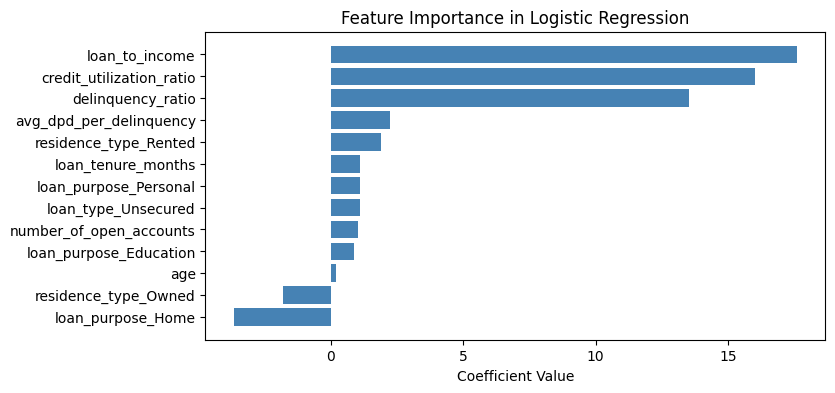

In [439]:
# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

#### Saving the Trained Model

In [440]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [442]:
col_to_scale


['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [445]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': col_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [446]:
final_model.coef_, final_model.intercept_

(array([[ 0.19691789,  1.09696653,  1.02272783, 16.02216069, 17.61907388,
         13.51720617,  2.21979683, -1.8302072 ,  1.90563683,  0.87628236,
         -3.67789651,  1.08930866,  1.08930866]]),
 array([-21.07935037]))